# Deteção de Overfitting

## O que é?

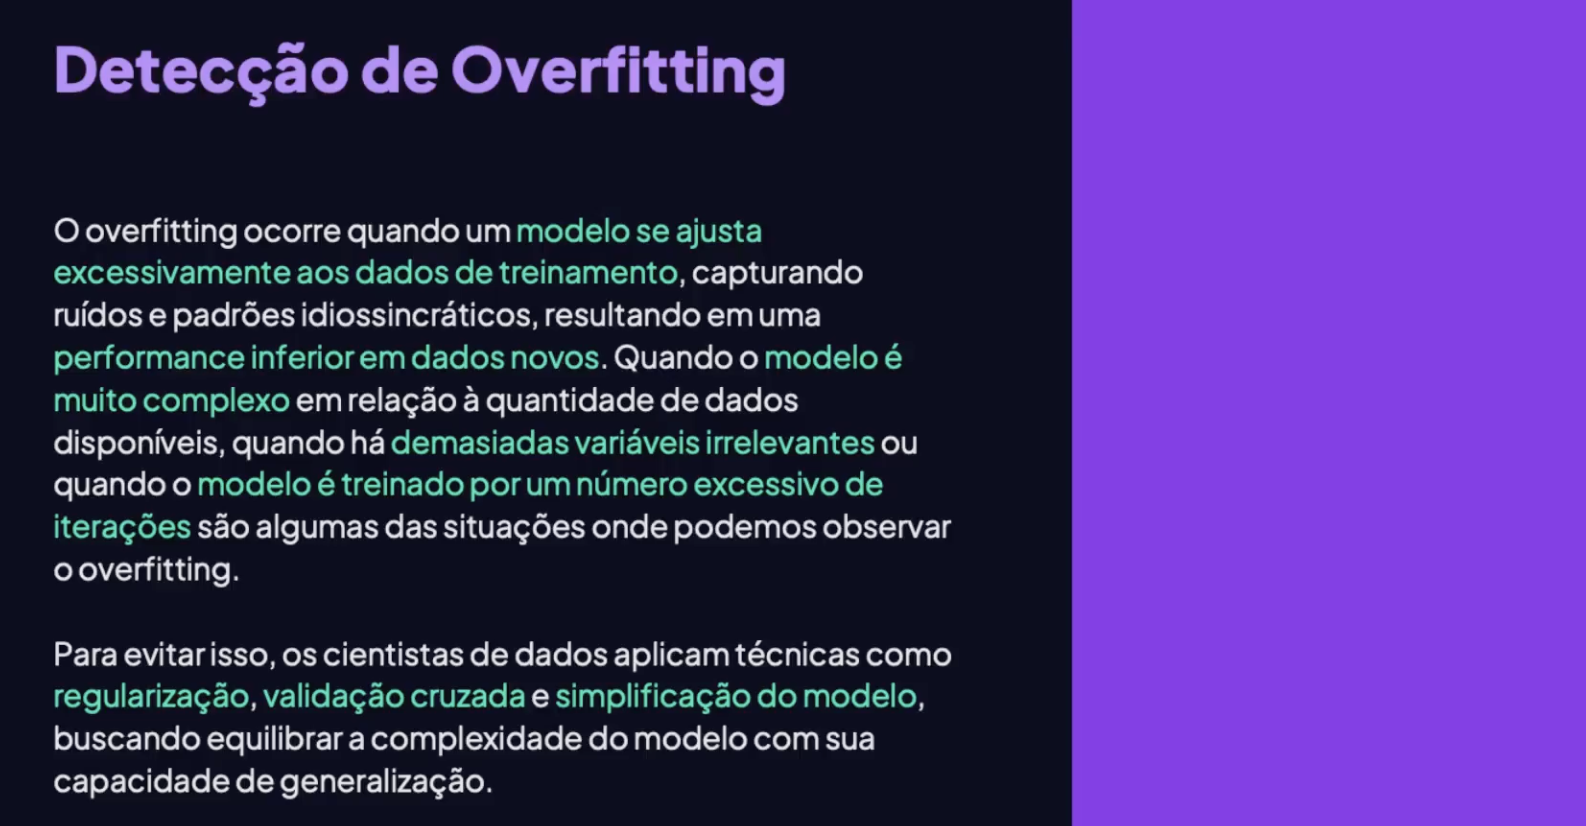

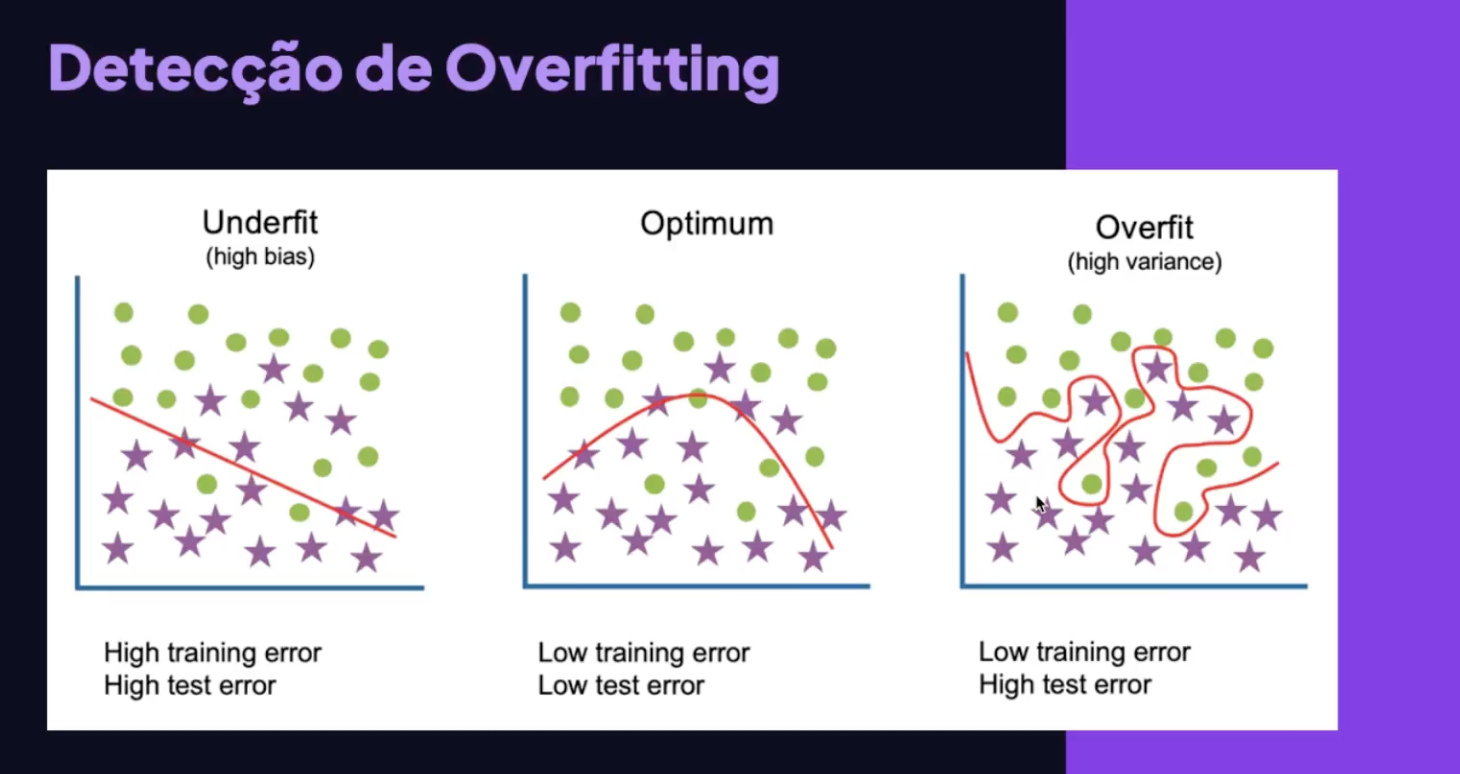

## KNN

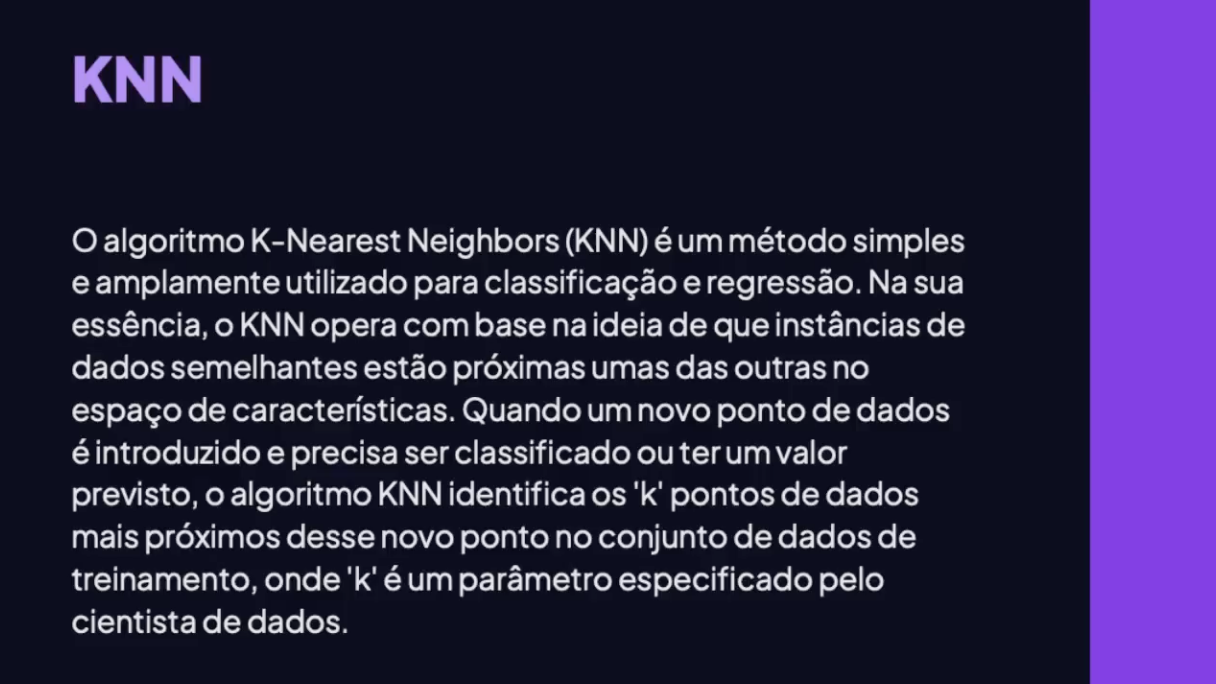

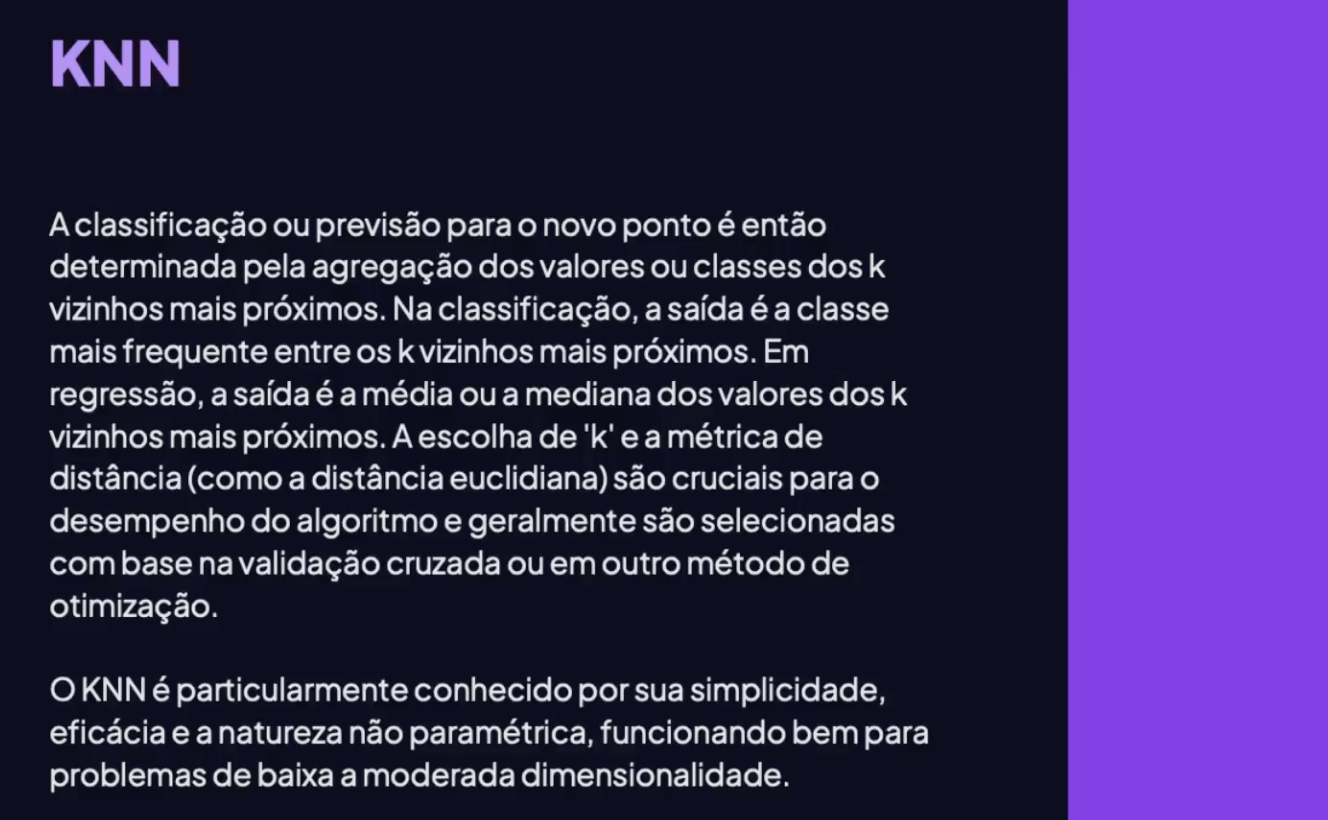

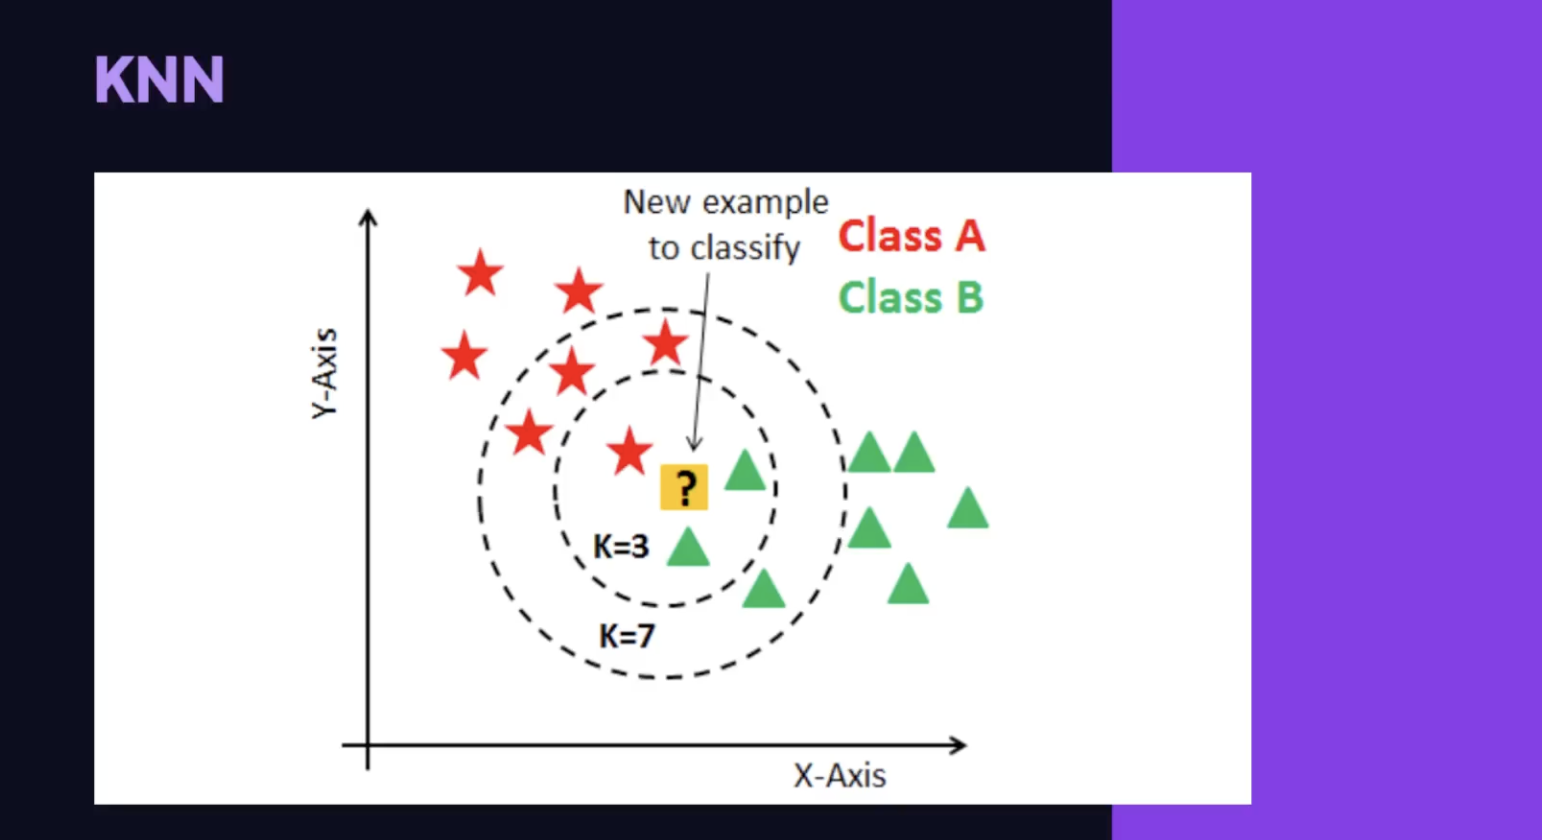

## Importações

In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import root_mean_squared_error, f1_score

from numpy import linspace, mean
import plotly.express as px

## Regressão

### Carregamento dos dados

In [2]:
df_colesterol = pd.read_csv('./dataset/colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
# Transformar variaveis categóricas em numéricas
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

df_colesterol = pd.get_dummies(df_colesterol, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

df_colesterol.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,False,False,True,False,False,True,False,True,False
1,68,105.0,184,236.98,True,False,False,False,True,False,False,False,True
2,25,64.8,180,161.79,False,False,False,True,True,False,True,False,False
3,43,120.2,167,336.24,True,False,False,False,True,False,True,False,False
4,79,88.5,175,226.23,False,True,False,False,True,False,False,True,False
5,68,66.8,170,185.31,False,False,True,False,True,False,False,True,False
6,60,117.3,181,289.33,True,False,False,False,False,True,False,True,False
7,35,86.9,174,216.48,False,False,False,True,False,True,False,False,True
8,62,81.3,166,235.30,False,False,False,True,True,False,False,True,False
9,44,32.7,165,97.79,False,False,True,False,False,True,True,False,False


### Treinar modelo visualizando a curva de aprendizado

In [5]:
# Separar X e y
X = df_colesterol.drop(columns=['Colesterol'])
y = df_colesterol['Colesterol']

In [6]:
model_reg = LinearRegression()

In [7]:
# Gerar scores da Curva de Aprendizado - Regressão
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_root_mean_squared_error', cv=3)

In [8]:
# Train Scores
train_scores

array([[-6.89846936, -8.75165029, -8.75165029],
       [-7.41399963, -9.44758228, -9.44758228],
       [-7.83969641, -9.07641181, -9.07641181],
       [-8.12622867, -9.01610984, -9.01610984],
       [-8.05175455, -9.1155504 , -9.1155504 ],
       [-7.9850157 , -8.85581488, -8.90398566],
       [-8.1058845 , -8.85090458, -8.75924645],
       [-8.17849767, -8.80295848, -8.75142524],
       [-8.38602953, -8.92266501, -8.76606173]])

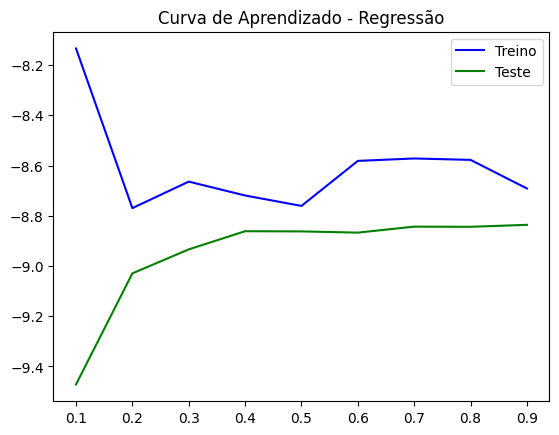

In [10]:
# Gerar plot com curva de aprendizado
plt.plot(linspace(0.1, 0.9, 9), mean(train_scores, axis=1), color='b', label='Treino')
plt.plot(linspace(0.1, 0.9, 9), mean(test_scores, axis=1), color='g', label='Teste')
plt.title('Curva de Aprendizado - Regressão Linear')
plt.legend()
plt.show()

## Classificação

### Carregamento dos dados

In [11]:
df_fruit_quality = pd.read_csv('./dataset/fruit_quality.csv')

In [12]:
df_fruit_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [13]:
df_fruit_quality.drop(columns=['A_id'], axis=1, inplace=True)
df_fruit_quality.Quality = (df_fruit_quality.Quality == 'good').astype(int)
df_fruit_quality

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Treinar modelo com KNN com mudança de K

In [14]:
# Separar X e y
X = df_fruit_quality.drop(columns=['Quality'])
y = df_fruit_quality['Quality']

In [15]:
# Separar modelo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [17]:
# Fazer loop para treinar modelo com diversos vizinhos (K)
scores_train = []
scores_test = []

for i in range(1, 20, 2):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train, y_train)
  
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  
  scores_train.append(f1_score(y_train, y_train_pred))
  scores_test.append(f1_score(y_test, y_test_pred))
  print(f'{i}: F1_Train: {f1_score(y_train, y_train_pred)} - F1_Test: {f1_score(y_test, y_test_pred)}')

1: F1_Train: 1.0 - F1_Test: 0.8740617180984154
3: F1_Train: 0.9452103216684341 - F1_Test: 0.8964941569282137
5: F1_Train: 0.9262266148958701 - F1_Test: 0.8985985160758451
7: F1_Train: 0.921935711762628 - F1_Test: 0.8929460580912864
9: F1_Train: 0.9186704384724187 - F1_Test: 0.8913043478260869
11: F1_Train: 0.9178130511463845 - F1_Test: 0.8887029288702929
13: F1_Train: 0.9115983026874116 - F1_Test: 0.8881469115191987
15: F1_Train: 0.9133969600565571 - F1_Test: 0.890728476821192
17: F1_Train: 0.9099258212645708 - F1_Test: 0.8883333333333333
19: F1_Train: 0.9115885875308207 - F1_Test: 0.885


In [18]:
# Criar dataframe com os resultados
df_scores = pd.DataFrame({'K': range(1, 20, 2), 'train': scores_train, 'test': scores_test})

In [19]:
df_scores

,K,train,test
0,1,1.000000,0.874062
1,3,0.945210,0.896494
2,5,0.926227,0.898599
3,7,0.921936,0.892946
4,9,0.918670,0.891304
5,11,0.917813,0.888703
6,13,0.911598,0.888147
7,15,0.913397,0.890728
8,17,0.909926,0.888333
9,19,0.911589,0.885000


In [21]:
# Plotar gráfico de F1 Score
xaxis = x = [i for i in range(1, 20, 2)]
fig = px.line(df_scores, x='K', y=['train', 'test'], title='KNN performance - Mudando K')
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in x])
fig.show()